In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Simple tensor creation & operations

In [ ]:
ones = tf.ones([3,3])
zeros = tf.zeros([3,3])
random_normal = tf.random.normal([3,3], mean=0, stddev=1)
random_uniform = tf.random.uniform([3,3], minval=0, maxval=1)

print(ones, zeros, random_normal, random_uniform)
print('===============================')


# everything wrapped inside of a tf.Variable can me mutated using special mutation methods
variable = tf.Variable(tf.random.uniform(shape=[3,3], minval=0, maxval=1))
print(variable)
# variable.assign(tf.ones([3,3]))
variable.assign_add(tf.ones([3, 3]))
print(variable)

## Gradient Calculation using GradientTape. (Simple empirical math with assertions nothing complex)

In [ ]:
input_variables = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_variables)

gradient = tape.gradient(result, input_variables) # Gradient of x^2 evaluated at x = 3 is 2*x = 6

# Assert the tensor value
assert gradient.numpy() == 6

## Linear classifier from scratch using tf basics

#### Synthetic data sampling and plotting

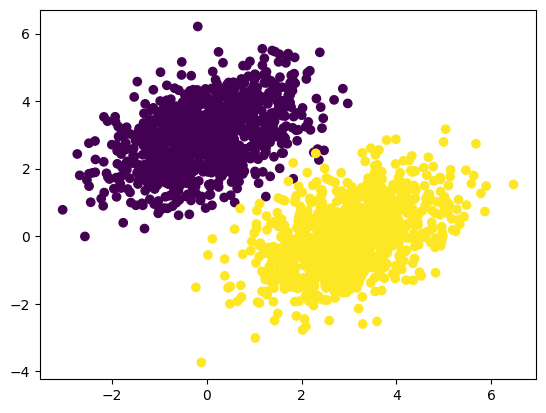

In [114]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
outputs = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32'))) # 0 for negative, 1 for positive

plt.scatter(inputs[:, 0],
            inputs[:, 1], c=outputs[:, 0])

#### Linear Model creation from tf basics

In [ ]:
# Since it's a linear classifier linear equations have: y = wx + b form. Where w is our weights and b is our bias
class CustomLinearModel():
    def __init__(self, dimension, epochs=100):
        self.dimension = dimension
        self.epochs = epochs
        self.weights = tf.Variable(tf.random.uniform(shape=(dimension, 1))) # shape=(2,1) because we have 2 features and 1 output
        self.bias = tf.Variable(tf.random.uniform(shape=(1,))) # shape=(1,) is the same as shape=(1,1)
        self.learning_rate = 0.01
    
    def loss(self, output, prediction):
        return tf.reduce_mean(tf.square(tf.subtract(output, prediction)))
    
    def train(self, inputs, outputs):
        for epoch in range(self.epochs):
            with tf.GradientTape() as tape:
                predictions = tf.add(tf.matmul(inputs, self.weights), self.bias)
                loss = self.loss(outputs, predictions)
            dloss_dw, dloss_db = tape.gradient(loss, [self.weights, self.bias])
            self.weights.assign_sub(dloss_dw * self.learning_rate)
            self.bias.assign_sub(dloss_db * self.learning_rate)
            print(f"Loss at epoch: {epoch} is {loss}")
            
    def infer(self, inputs):
        return tf.add(tf.matmul(inputs, self.weights), self.bias)

model = CustomLinearModel(2)
model.train(inputs, outputs)

#### Plotting original input->outputs and predictions->outputs of custom linear model side by side

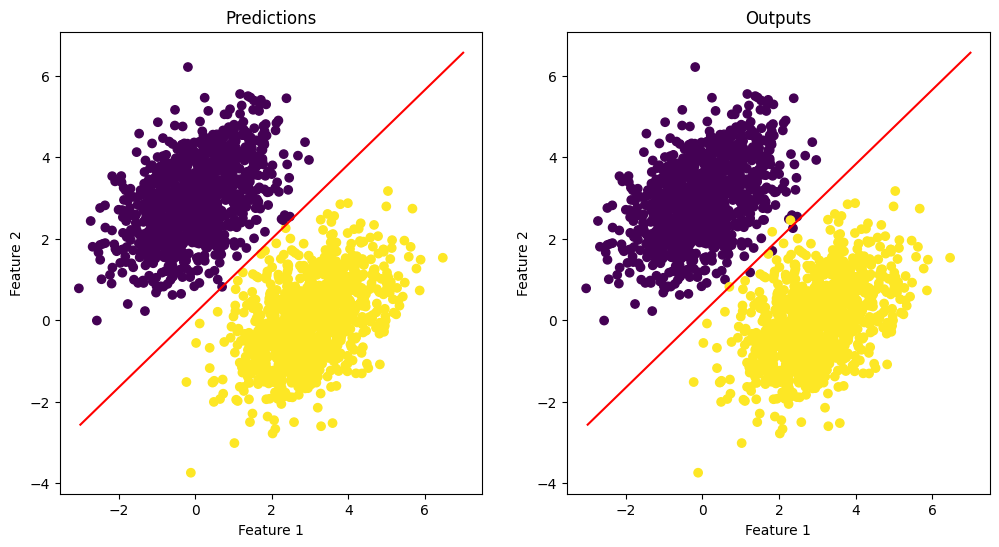

In [115]:
predictions = model.infer(inputs)

# x = np.linspace(-3, 7, 100)
# y = (-model.weights[0] * x + (0.5 - model.bias)) / model.weights[1]
# plt.plot(x, y, color='red')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with predictions
ax1.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
ax1.set_title('Predictions')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Scatter plot with outputs
ax2.scatter(inputs[:, 0], inputs[:, 1], c=outputs[:, 0])
ax2.set_title('Outputs')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

x = np.linspace(-3, 7, 100)
y = (-model.weights[0] * x + (0.5 - model.bias)) / model.weights[1]
ax1.plot(x, y, color='red')
ax2.plot(x, y, color='red')

plt.show()



